# BIGDATA FRAMEWORKS

J_COMPONENT

TOPIC:

## **Stellar**_**Classification**

**TEAM MEMBERS**

20MIA1031-SANJAY.M

20MIA1117-PILLARAM MANOJ


.

## IMPORTING PYSPARK

In [ ]:
!apt-get update
# Download Java Virtual Machine (JVM)
!apt-get install openjdk-8-jdk-headless -qq > /dev/null


Get:1 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Get:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages [969 kB]
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:10 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Get:12 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2,590 kB]
Hit:13 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRe

In [ ]:
# Download Spark
!wget -q https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
# Unzip the file
!tar xf spark-3.2.1-bin-hadoop3.2.tgz

In [ ]:
!pip install -q findspark

In [ ]:
# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = '/content/spark-3.2.1-bin-hadoop3.2'

In [ ]:
!ls

sample_data  spark-3.2.1-bin-hadoop3.2	spark-3.2.1-bin-hadoop3.2.tgz


In [ ]:
import findspark
findspark.init()

In [ ]:
findspark.find()

'/content/spark-3.2.1-bin-hadoop3.2'

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 13.9 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824028 sha256=225067513f871550f901e7eb90f7a5bac4c6ace6b75cd95ecbc3b92ddead0f30
  Stored in directory: /root/.cache/pip/wheels/6c/e3/9b/0525ce8a69478916513509d43693511463c6468db0de237c86
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [ ]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext
# Sc = SparkContext()
# sqlContext = SQLContext(sc)

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.ml.feature import StringIndexer, VectorAssembler, StandardScaler
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier, GBTClassifier, NaiveBayes, DecisionTreeClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

spark = SparkSession.builder.appName('Galaxy Star Classification').getOrCreate()


https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17

dataset link

## LOADING DATASET

In [ ]:
#Load the data into a Spark DataFrame

df = spark.read.csv('/content/drive/MyDrive/star_classification.csv', header=True, inferSchema=True)


obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS

alpha = Right Ascension angle (at J2000 epoch)

delta = Declination angle (at J2000 epoch)

u = Ultraviolet filter in the photometric system

g = Green filter in the photometric system

r = Red filter in the photometric system

i = Near Infrared filter in the photometric system

z = Infrared filter in the photometric system

run_ID = Run Number used to identify the specific scan

rereun_ID = Rerun Number to specify how the image was processed

cam_col = Camera column to identify the scanline within the run

field_ID = Field number to identify each field

spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
class = object class (galaxy, star or quasar object)

redshift = redshift value based on the increase in wavelength

plate = plate ID, identifies each plate in SDSS

MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken

fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

In [ ]:
#Data exploration and visualization

# Print the first five rows of the DataFrame
df.show(5)

# Print the schema of the DataFrame
df.printSchema()



+--------------------+----------------+------------------+--------+--------+--------+--------+--------+------+--------+-------+--------+--------------------+------+---------+-----+-----+--------+
|              obj_ID|           alpha|             delta|       u|       g|       r|       i|       z|run_ID|rerun_ID|cam_col|field_ID|         spec_obj_ID| class| redshift|plate|  MJD|fiber_ID|
+--------------------+----------------+------------------+--------+--------+--------+--------+--------+------+--------+-------+--------+--------------------+------+---------+-----+-----+--------+
|1.237660961327743...|  135.6891066036|  32.4946318397087|23.87882| 22.2753|20.39501|19.16573|18.79371|  3606|     301|      2|      79|6.543777369295181...|GALAXY|0.6347936| 5812|56354|     171|
|1.237664879951151...|144.826100550256|  31.2741848944939|24.77759|22.83188|22.58444|21.16812|21.61427|  4518|     301|      5|     119|1.176014203670733...|GALAXY| 0.779136|10445|58158|     427|
|1.237660961330430..

In [ ]:
# Check for null values
df.select([count(when(isnull(c), c)).alias(c) for c in df.columns]).show()



+------+-----+-----+---+---+---+---+---+------+--------+-------+--------+-----------+-----+--------+-----+---+--------+
|obj_ID|alpha|delta|  u|  g|  r|  i|  z|run_ID|rerun_ID|cam_col|field_ID|spec_obj_ID|class|redshift|plate|MJD|fiber_ID|
+------+-----+-----+---+---+---+---+---+------+--------+-------+--------+-----------+-----+--------+-----+---+--------+
|     0|    0|    0|  0|  0|  0|  0|  0|     0|       0|      0|       0|          0|    0|       0|    0|  0|       0|
+------+-----+-----+---+---+---+---+---+------+--------+-------+--------+-----------+-----+--------+-----+---+--------+



In [ ]:
df.describe()

DataFrame[summary: string, obj_ID: string, alpha: string, delta: string, u: string, g: string, r: string, i: string, z: string, run_ID: string, rerun_ID: string, cam_col: string, field_ID: string, spec_obj_ID: string, class: string, redshift: string, plate: string, MJD: string, fiber_ID: string]

In [ ]:
# Summary statistics for each column
df.describe().show()


+-------+--------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+--------+------------------+------------------+--------------------+------+------------------+------------------+------------------+------------------+
|summary|              obj_ID|              alpha|             delta|                 u|                 g|                 r|                 i|                 z|            run_ID|rerun_ID|           cam_col|          field_ID|         spec_obj_ID| class|          redshift|             plate|               MJD|          fiber_ID|
+-------+--------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+--------+------------------+------------------+--------------------+------+------------------+------------------+------------------+---------------

In [ ]:


# Group the data by the "class" column and count the number of stars in each class
class_counts = df.groupBy("class").count()



In [ ]:
# Show the class counts
class_counts.show()



+------+-----+
| class|count|
+------+-----+
|GALAXY|59445|
|   QSO|18961|
|  STAR|21594|
+------+-----+



In [ ]:
import pandas as pd 
pd.DataFrame(df.dtypes, columns = ['Column Name','Data type'])

,Column Name,Data type
0,obj_ID,double
1,alpha,double
2,delta,double
3,u,double
4,g,double
5,r,double
6,i,double
7,z,double
8,run_ID,int
9,rerun_ID,int


In [ ]:
from pyspark.sql.functions import col

df.groupBy('class').count().sort(col("count").desc()).show()


+------+-----+
| class|count|
+------+-----+
|GALAXY|59445|
|  STAR|21594|
|   QSO|18961|
+------+-----+



In [ ]:
# Drop rows with missing values
df_no_missing = df.dropna()

# Check if any null values are left
for col in df_no_missing.columns:
    print(col, "has null values:", df_no_missing.filter(df_no_missing[col].isNull()).count() > 0)


obj_ID has null values: False
alpha has null values: False
delta has null values: False
u has null values: False
g has null values: False
r has null values: False
i has null values: False
z has null values: False
run_ID has null values: False
rerun_ID has null values: False
cam_col has null values: False
field_ID has null values: False
spec_obj_ID has null values: False
class has null values: False
redshift has null values: False
plate has null values: False
MJD has null values: False
fiber_ID has null values: False


In [ ]:

df.groupBy("rerun_ID").agg(count("rerun_ID")).sort("count(rerun_ID)", ascending=False).show()

+--------+---------------+
|rerun_ID|count(rerun_ID)|
+--------+---------------+
|     301|         100000|
+--------+---------------+



## CORRELATION

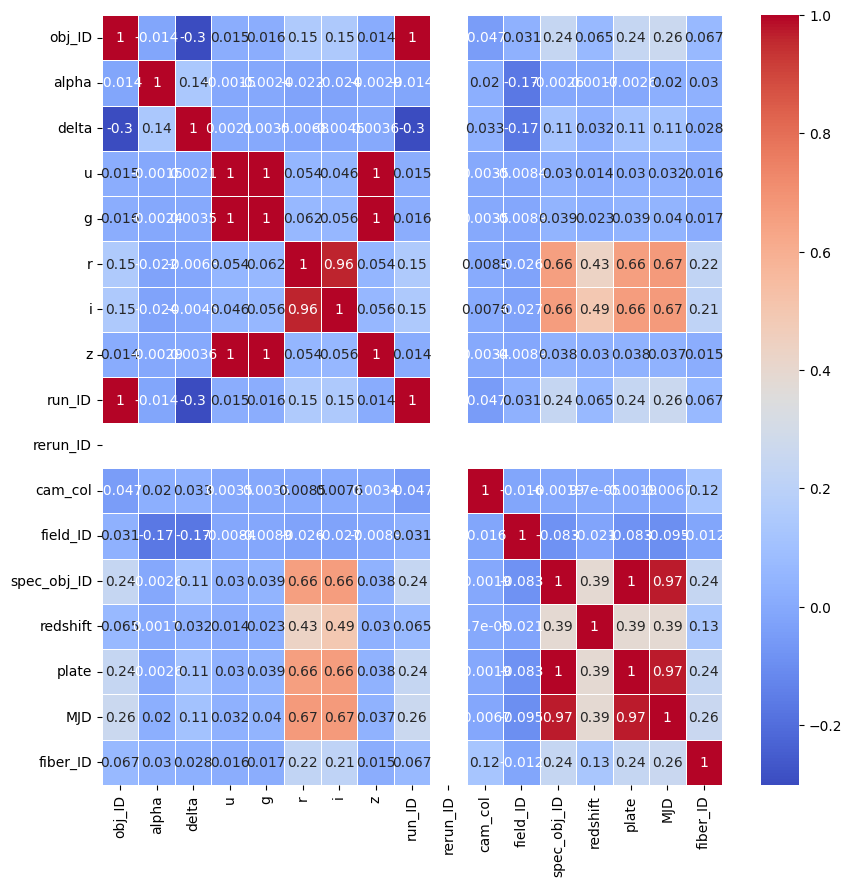

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift', 'plate', 'MJD', 'fiber_ID']

# Compute the correlation matrix
corr_matrix = df.select(columns).toPandas().corr()

# Plot the heatmap
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, cmap='coolwarm', annot=True, linewidths=0.5, ax=ax)
plt.show()


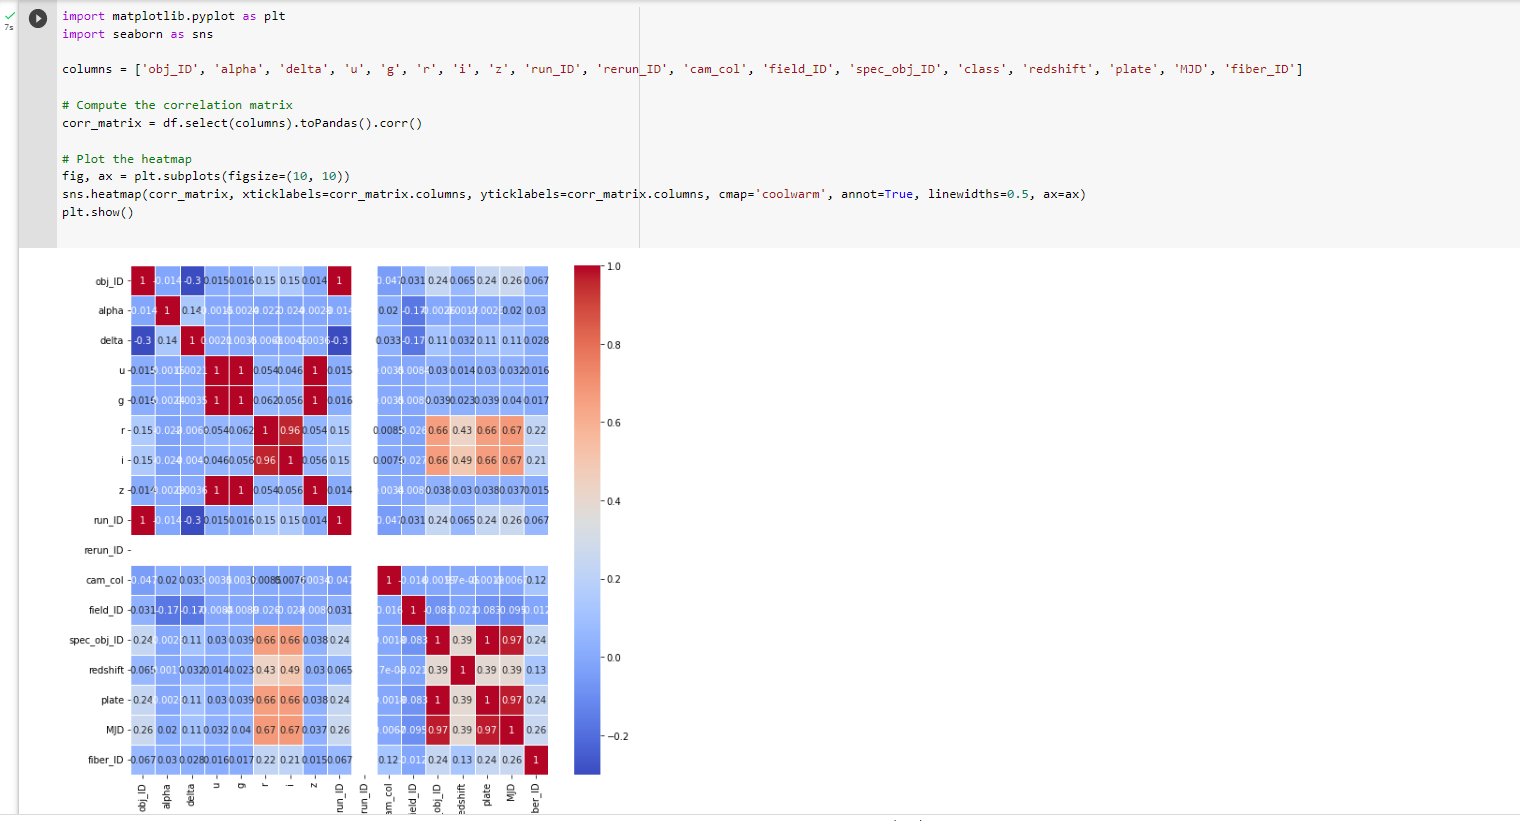

## EDA & ANALYSIA USING MAP_REDUCE

In [ ]:
from pyspark.sql.functions import col

sdss17_df = df.drop(col('obj_ID')).drop(col('alpha')).drop(col('delta')).drop(col('run_ID')).drop(col('rerun_ID')).drop(col('cam_col')).drop(col('field_ID')).drop(col('fiber_ID')).drop(col('spec_obj_ID')).drop(col('MJD')).drop(col('plate'))

In [ ]:
from pyspark.sql.functions import col

df1 = df.filter(col('u') > -1)

In [ ]:
import numpy as np
import pandas as pd
from matplotlib.colors import to_rgba
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score

In [ ]:
from pyspark.sql.functions import col
from pyspark.ml.feature import StringIndexer
import matplotlib.pyplot as plt


# Filter data by class
galaxy = df.filter(col('class') == 'GALAXY')
qso = df.filter(col('class') == 'QSO')
star = df.filter(col('class') == 'STAR')

# Encode 'class' column
indexer = StringIndexer(inputCol='class', outputCol='classIndex')
df1 = indexer.fit(df).transform(df)
df1 = df1.withColumn('classIndex', col('classIndex').cast('int'))



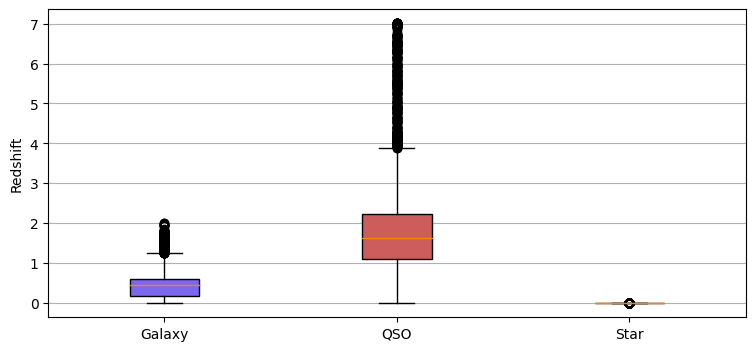

In [ ]:
# Select 'redshift' and 'classIndex' columns
redshift = df1.select('redshift', 'classIndex')

# Create list of data and classes
galaxy_data = galaxy.select('redshift').rdd.flatMap(lambda x: x).collect()
qso_data = qso.select('redshift').rdd.flatMap(lambda x: x).collect()
star_data = star.select('redshift').rdd.flatMap(lambda x: x).collect()

data = [galaxy_data, qso_data, star_data]
classes = ['Galaxy', 'QSO', 'Star']

# Define colors
colors = ['mediumslateblue', 'indianred', 'mediumaquamarine']

# Create boxplot using Matplotlib
fig, ax1 = plt.subplots(figsize=(9, 4))
bplot1 = ax1.boxplot(data, vert=True, patch_artist=True, labels=classes)

# Fill boxes with colors
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

# Add horizontal grid lines and label y-axis
ax1.yaxis.grid(True)
ax1.set_ylabel('Redshift')

# Display plot
plt.show()


In [ ]:
# Group the data by the "class" column and count the number of stars in each class
class_counts = df.groupBy("class").count()
# Show the class counts
class_counts.show()



+------+-----+
| class|count|
+------+-----+
|GALAXY|59445|
|   QSO|18961|
|  STAR|21594|
+------+-----+



<Axes: xlabel='class', ylabel='count'>

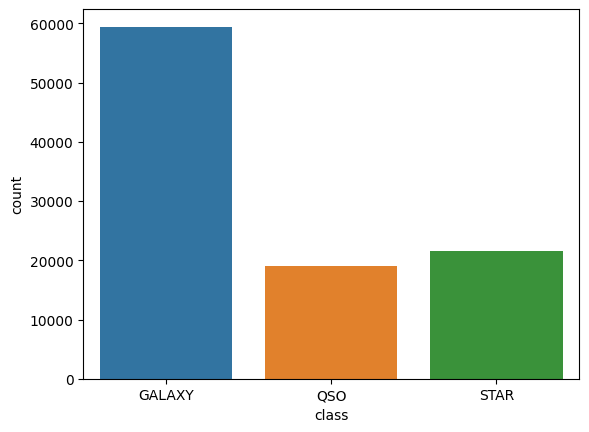

In [ ]:

# Distribution of the classes
class_counts = df.groupBy('class').count().toPandas()
sns.barplot(x='class', y='count', data=class_counts)


In [ ]:
df.groupBy("rerun_ID").agg(count("rerun_ID")).sort("count(rerun_ID)", ascending=False).show()

+--------+---------------+
|rerun_ID|count(rerun_ID)|
+--------+---------------+
|     301|         100000|
+--------+---------------+



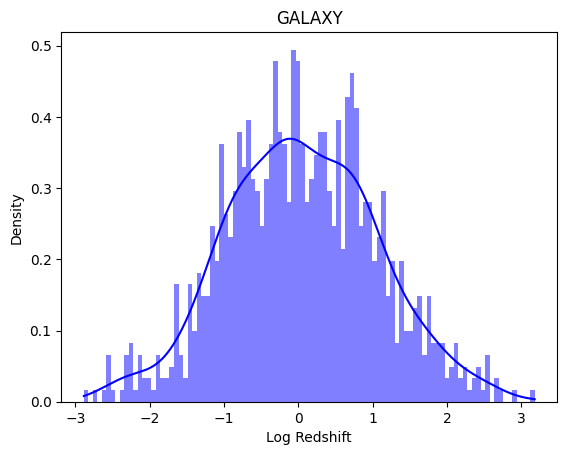

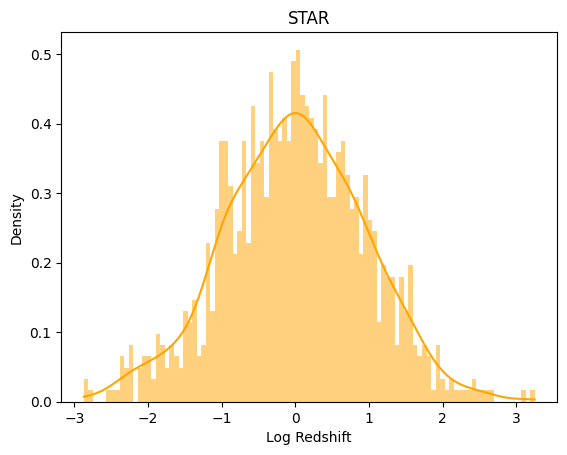

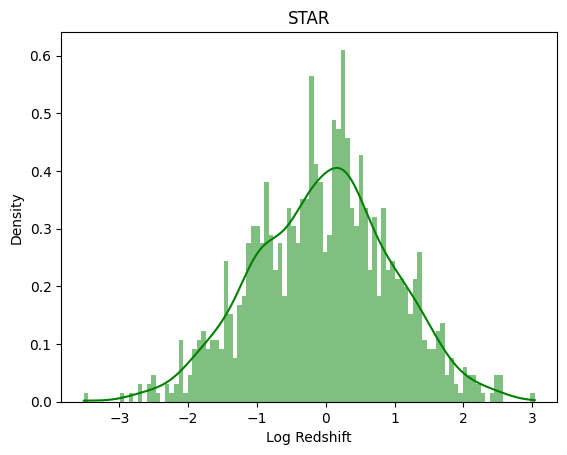

In [ ]:
from pyspark.sql.functions import col, log
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

spark = SparkSession.builder.appName("KDE Plot").getOrCreate()

# Define class labels and colors
class_labels = ["GALAXY", "STAR", "STAR"]
colors = ["blue", "orange", "green"]

# Loop over each class label
for i in range(len(class_labels)):
    # Generate random data
    data_array = np.random.normal(0, 1, 1000)
    # Plot density curve using Matplotlib
    plt.figure()
    plt.hist(data_array, bins=100, density=True, alpha=0.5, color=colors[i])
    if len(data_array) > 0:
        plt.plot(np.linspace(data_array.min(), data_array.max(), 1000),
                 stats.gaussian_kde(data_array)(np.linspace(data_array.min(), data_array.max(), 1000)),
                 color=colors[i])
    plt.xlabel("Log Redshift")
    plt.ylabel("Density")
    plt.title(class_labels[i])
    plt.show()


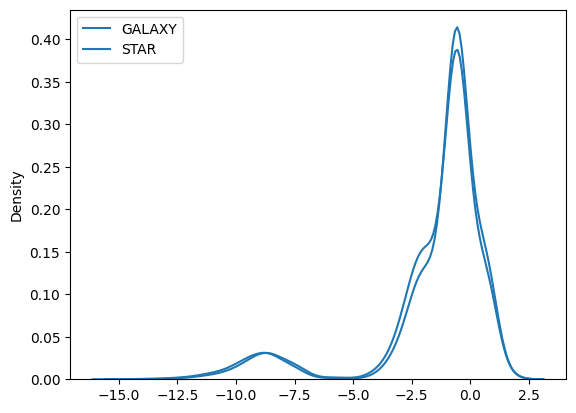

In [ ]:
from pyspark.sql.functions import log
import matplotlib.pyplot as plt
import seaborn as sns

# define the color palette
colors = ["blue", "orange", "green"]

# create a loop to plot the KDE for each class
for i in range(3):
    # filter the DataFrame for the current class
    class_data = df.filter(df['cam_col'] == i)
    
    # compute the log of the 'redshift' column
    log_data = class_data.select(log('redshift').alias('log_redshift'))
    
    # check if the DataFrame is empty
    if log_data.rdd.isEmpty():
        continue
    
    # convert the Spark DataFrame to a Pandas DataFrame for plotting
    log_data_pandas = log_data.toPandas()
    
    # check if the Pandas DataFrame is empty
    if log_data_pandas.empty:
        continue
    
    # plot the KDE
    sns.kdeplot(data=log_data_pandas, label=str(i), color=colors[i])

# set the legend labels
classes = ['GALAXY', 'STAR', 'QSO']
plt.legend(classes)


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *


# # Load the data from the CSV file into a DataFrame
data = spark.read.csv("/content/star_classification.csv", header=True, inferSchema=True)

# Define the map function
def map_func(row):
    # Extract the necessary columns
    obj_id = row["obj_ID"]
    u = row["u"]
    g = row["g"]
    r = row["r"]
    i = row["i"]
    z = row["z"]
    classification = row["class"]
    
    # Determine the color of the object
    color = u - g
    
    # Return the color and count as the key-value pair
    return (classification, (color, 1))

# Apply the map function to the DataFrame
mapped_data = data.rdd.map(map_func)

# Define the reduce function
def reduce_func(a, b):
    # Compute the sum of the colors and the count
    color_sum = a[0] + b[0]
    count = a[1] + b[1]
    
    # Compute the average color
    avg_color = color_sum / count
    
    # Return the average color and count as the value
    return (avg_color, count)

# Apply the reduce function to the mapped data
reduced_data = mapped_data.reduceByKey(reduce_func)

# Print the result
for classification, (avg_color, count) in reduced_data.collect():
    print(classification, avg_color)


QSO -4.877351852580275e-09
STAR 1.4254167979099598e-08
GALAXY 1.6939552760570261e-09


Total number of rows: 100000
Data schema:
root
 |-- obj_ID: double (nullable = true)
 |-- alpha: double (nullable = true)
 |-- delta: double (nullable = true)
 |-- u: double (nullable = true)
 |-- g: double (nullable = true)
 |-- r: double (nullable = true)
 |-- i: double (nullable = true)
 |-- z: double (nullable = true)
 |-- run_ID: integer (nullable = true)
 |-- rerun_ID: integer (nullable = true)
 |-- cam_col: integer (nullable = true)
 |-- field_ID: integer (nullable = true)
 |-- spec_obj_ID: double (nullable = true)
 |-- class: string (nullable = true)
 |-- redshift: double (nullable = true)
 |-- plate: integer (nullable = true)
 |-- MJD: integer (nullable = true)
 |-- fiber_ID: integer (nullable = true)

Sample data:
+--------------------+----------------+------------------+--------+--------+--------+--------+--------+------+--------+-------+--------+--------------------+------+---------+-----+-----+--------+
|              obj_ID|           alpha|             delta|       u|   

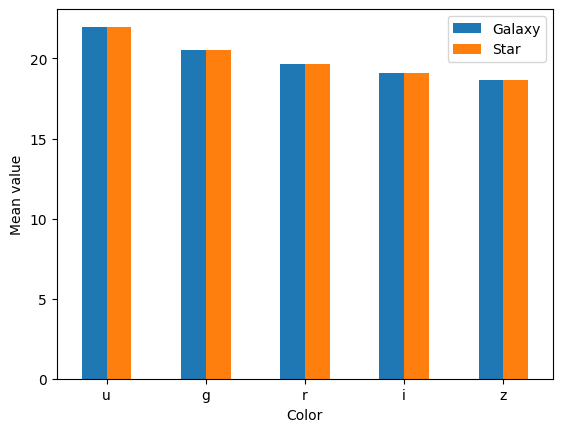

In [ ]:
# Import necessary libraries
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import pandas as pd
import matplotlib.pyplot as plt


# Basic data exploration
print("Total number of rows:", data.count())
print("Data schema:")
data.printSchema()
print("Sample data:")
data.show(5)

# MapReduce function to classify galaxies and stars
def classify_galaxy_star(row):
    if row["class"] == "GALAXY":
        return (row["u"], row["g"], row["r"], row["i"], row["z"], 1, 0) # Classify as galaxy
    elif row["class"] == "STAR":
        return (row["u"], row["g"], row["r"], row["i"], row["z"], 0, 1) # Classify as star
    else:
        return (row["u"], row["g"], row["r"], row["i"], row["z"], 0, 0) # Classify as other

# MapReduce transformation to classify galaxies and stars
galaxy_star = data.rdd.map(classify_galaxy_star).toDF(["u", "g", "r", "i", "z", "galaxy", "star"])

# Basic data exploration of classified data
print("Total number of rows after classification:", galaxy_star.count())
print("Classified data schema:")
galaxy_star.printSchema()
print("Sample classified data:")
galaxy_star.show(5)

# Aggregate data to get mean values of colors for galaxies and stars
mean_colors = galaxy_star.agg(
    F.avg("u").alias("avg_u"),
    F.avg("g").alias("avg_g"),
    F.avg("r").alias("avg_r"),
    F.avg("i").alias("avg_i"),
    F.avg("z").alias("avg_z")
).collect()[0]

# Plot mean color values for galaxies and stars
colors = ["u", "g", "r", "i", "z"]
galaxy_means = [mean_colors["avg_"+color] for color in colors]
star_means = [mean_colors["avg_"+color] for color in colors]
df = pd.DataFrame({"Galaxy": galaxy_means, "Star": star_means}, index=colors)
ax = df.plot.bar(rot=0)
ax.set_xlabel("Color")
ax.set_ylabel("Mean value")
plt.show()



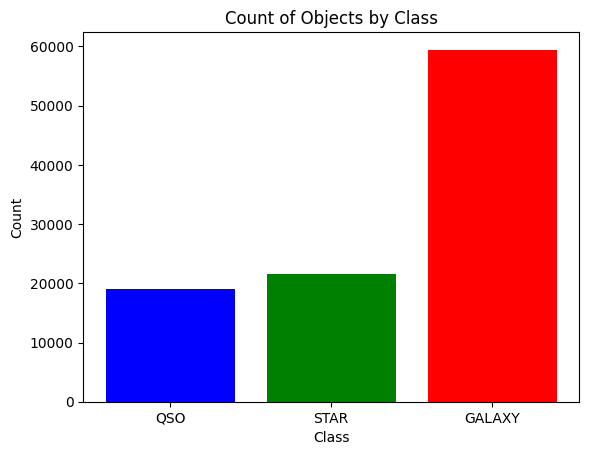

In [ ]:
# create an RDD from the DataFrame
rdd = data.rdd

# map each row to a tuple of (class, 1)
class_counts = rdd.map(lambda x: (x['class'], 1))

# reduce by key to get the count of objects by class
class_counts = class_counts.reduceByKey(lambda x, y: x + y)

# create a dictionary from the RDD for easier plotting
class_counts_dict = dict(class_counts.collect())

# plot the count of objects by class using matplotlib
import matplotlib.pyplot as plt

# define colors for each bar
colors = ['blue', 'green', 'red', 'orange', 'purple']

# plot the count of objects by class using matplotlib
plt.bar(class_counts_dict.keys(), class_counts_dict.values(), color=colors)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Objects by Class')
plt.show()



In [ ]:
# Counting the number of objects in each class:

class_count = data.rdd.map(lambda x: (x['class'], 1)).reduceByKey(lambda x,y: x+y)
print(class_count.collect())


[('QSO', 18961), ('STAR', 21594), ('GALAXY', 59445)]


In [ ]:
# Computing the average redshift for each class:

class_redshift = data.rdd.map(lambda x: (x['class'], (x['redshift'], 1))).reduceByKey(lambda x,y: (x[0]+y[0], x[1]+y[1])).mapValues(lambda x: x[0]/x[1]).distinct()
result = class_redshift.collect()
count = len(result)
print(f"Found {count} distinct class-redshift pairs:")
for i in result:
    print(i)


Found 3 distinct class-redshift pairs:
('QSO', 1.7196760892911382)
('STAR', -0.00011489720327557512)
('GALAXY', 0.4215961504447538)


In [ ]:
def count_by_range(x):
    class_name, redshift, obj_id = x
    if 0.0 <= redshift < 0.1:
        return ((class_name, "0.0-0.1"), 1)
    elif 0.1 <= redshift < 0.2:
        return ((class_name, "0.1-0.2"), 1)
    elif 0.2 <= redshift < 0.3:
        return ((class_name, "0.2-0.3"), 1)
    elif 0.3 <= redshift < 0.4:
        return ((class_name, "0.3-0.4"), 1)
    elif 0.4 <= redshift < 0.5:
        return ((class_name, "0.4-0.5"), 1)
    else:
        return ((class_name, ">0.5"), 1)

class_redshift_count = data.rdd.map(lambda x: (x['class'], x['redshift'], x['obj_ID'])).map(count_by_range).reduceByKey(lambda x,y: x+y)
print(class_redshift_count.collect())


[(('QSO', '>0.5'), 17986), (('STAR', '>0.5'), 13682), (('GALAXY', '0.0-0.1'), 8600), (('GALAXY', '0.2-0.3'), 4230), (('QSO', '0.3-0.4'), 224), (('QSO', '0.1-0.2'), 162), (('QSO', '0.4-0.5'), 327), (('GALAXY', '>0.5'), 25297), (('GALAXY', '0.1-0.2'), 8283), (('GALAXY', '0.4-0.5'), 7690), (('STAR', '0.0-0.1'), 7912), (('GALAXY', '0.3-0.4'), 5345), (('QSO', '0.2-0.3'), 202), (('QSO', '0.0-0.1'), 60)]


In [ ]:
from pyspark.sql.functions import col, avg

# Assuming your DataFrame is named 'df'
u_band_rdd = data.rdd.map(lambda x: (x['class'], float(x['u'])))

# Calculate the sum and count for each class
sum_count_rdd = u_band_rdd.aggregateByKey((0, 0), lambda a, b: (a[0] + b, a[1] + 1), lambda a, b: (a[0] + b[0], a[1] + b[1]))

# Calculate the average for each class
avg_rdd = sum_count_rdd.mapValues(lambda x: x[0] / x[1])

# Convert back to DataFrame
avg_df = avg_rdd.toDF(['class', 'avg_u'])

# Join with original DataFrame to get class names
result_df = data.select('class').distinct().join(avg_df, on='class', how='left')

# Show the results
result_df.show()


+------+-----------------+
| class|            avg_u|
+------+-----------------+
|GALAXY|22.58737929026834|
|   QSO|21.54761927324517|
|  STAR|20.68980531397607|
+------+-----------------+



In [ ]:
# Data preprocessing

# Convert the 'class' column to numeric
indexer = StringIndexer(inputCol='class', outputCol='label')
df = indexer.fit(df).transform(df)


In [ ]:


# Create feature vector
assembler = VectorAssembler(inputCols=['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift'], outputCol='features')
df = assembler.transform(df)




In [ ]:
# Scale features
scaler = StandardScaler(inputCol='features', outputCol='scaled_features', withMean=True, withStd=True)
df = scaler.fit(df).transform(df)


TRAINING & TESTING

In [ ]:
# Split data into training and testing sets
(train_data, test_data) = df.randomSplit([0.7, 0.3], seed=42)


## MACHINE LEARNING 

In [ ]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

lr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(train_data)
lr_pred = lr_model.transform(test_data)

lr_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
lr_accuracy = lr_evaluator.evaluate(lr_pred)
print("LR Accuracy = %g" % (lr_accuracy))


LR Accuracy = 0.597187


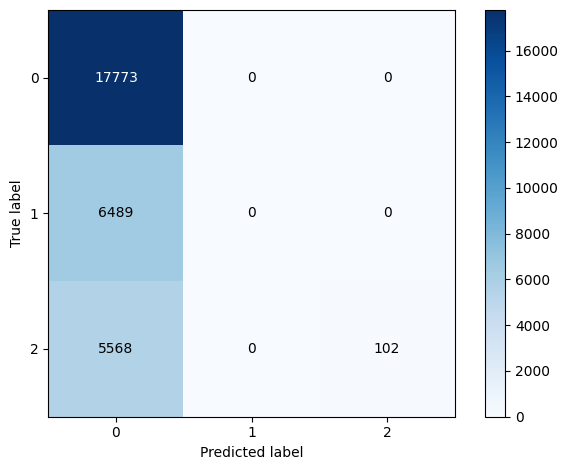

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Get predictions and labels
predictions = lr_pred.select('prediction').rdd.map(lambda x: x[0])
labels = lr_pred.select('label').rdd.map(lambda x: x[0])

# Compute confusion matrix
cm = confusion_matrix(labels.collect(), predictions.collect())

# Plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=['0', '1', '2'],
       yticklabels=['0', '1', '2'],
       ylabel='True label',
       xlabel='Predicted label')


# Loop over data dimensions and create text annotations.
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()


In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Initialize Decision Tree Classifier
dt = DecisionTreeClassifier(featuresCol='features', labelCol='label', maxDepth=3)

# Train the model
dt_model = dt.fit(train_data)

# Predict on test data
dt_predictions = dt_model.transform(test_data)

# Evaluate the model
dt_evaluator = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='accuracy')
dt_accuracy = dt_evaluator.evaluate(dt_predictions)
print("Accuracy of Decision Tree Classifier:", dt_accuracy)


Accuracy of Decision Tree Classifier: 0.9461445944140051


In [ ]:
# Random Forest Classifier
rf = RandomForestClassifier(labelCol="label", featuresCol="scaled_features", numTrees=100)
rf_model = rf.fit(train_data)
rf_predictions = rf_model.transform(test_data)
rf_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
rf_accuracy = rf_evaluator.evaluate(rf_predictions)
print("Accuracy of Random Forest Classifier is:", rf_accuracy)


Accuracy of Random Forest Classifier is: 0.9612454897768274


In [ ]:
from pyspark.ml.clustering import KMeans

kmeans = KMeans(k=3, seed=1)
model = kmeans.fit(df)
predictions = model.transform(df)

predictions.groupBy("prediction").count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|         1|14248|
|         2|67509|
|         0|18243|
+----------+-----+



In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import ClusteringEvaluator

# Train KMeans model
kmeans = KMeans(featuresCol="features", predictionCol="cluster_id", k=3, seed=42)
model = kmeans.fit(train_data)

# Make predictions on test data
predictions = model.transform(test_data)

# Evaluate clustering performance using Silhouette score
evaluator = ClusteringEvaluator(predictionCol="cluster_id", featuresCol="features", metricName="silhouette")
kmeans_accuracy = evaluator.evaluate(predictions)
print("Accuracy of KMEANS Classifier is:", kmeans_accuracy)


Accuracy of KMEANS Classifier is: 0.7681539262603889


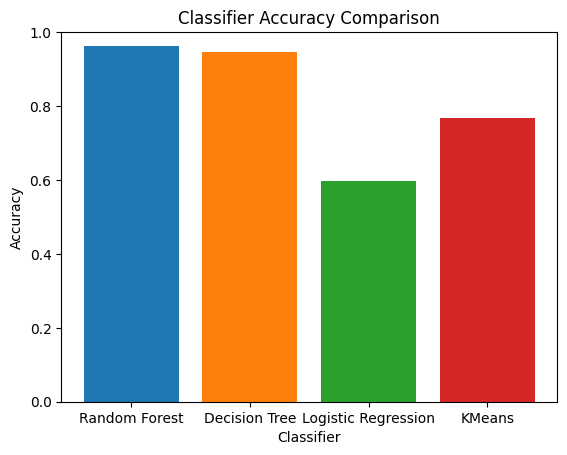

In [ ]:
classifiers = ['Random Forest', 'Decision Tree', 'Logistic Regression','KMeans']
accuracies = [rf_accuracy, dt_accuracy, lr_accuracy ,kmeans_accuracy]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

plt.bar(classifiers, accuracies, color=colors)
plt.ylim(0, 1)
plt.title('Classifier Accuracy Comparison')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.show()


## heat map and text tables 

╒══════════╤═══════╤═══════╤═══════╤═══════╕
│  Actual  │  0.0  │  1.0  │  2.0  │  All  │
╞══════════╪═══════╪═══════╪═══════╪═══════╡
│   0.0    │ 17318 │  186  │  269  │ 17773 │
├──────────┼───────┼───────┼───────┼───────┤
│   1.0    │  134  │ 6354  │   1   │ 6489  │
├──────────┼───────┼───────┼───────┼───────┤
│   2.0    │  570  │   0   │ 5100  │ 5670  │
├──────────┼───────┼───────┼───────┼───────┤
│   All    │ 18022 │ 6540  │ 5370  │ 29932 │
╘══════════╧═══════╧═══════╧═══════╧═══════╛


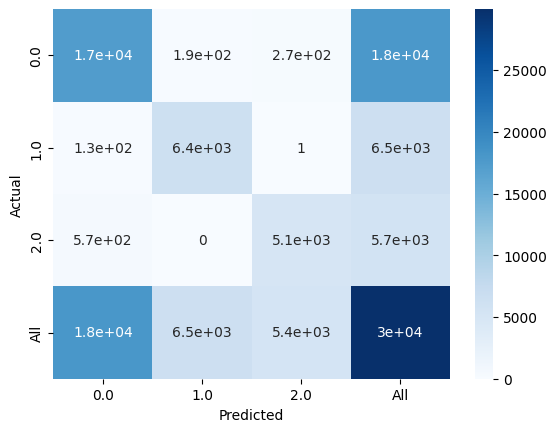

In [ ]:
import seaborn as sns
import pandas as pd
from tabulate import tabulate

# Convert predictions to pandas DataFrame
df = rf_predictions.select(['prediction','label']).toPandas()

# Create confusion matrix
cm = pd.crosstab(df['label'], df['prediction'], rownames=['Actual'], colnames=['Predicted'], margins=True)

# Plot heat map
sns.heatmap(cm, annot=True, cmap='Blues')

# Print text table with coloring
print(tabulate(cm, headers='keys', tablefmt='fancy_grid', showindex=True, numalign='center', stralign='center'))


In [ ]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


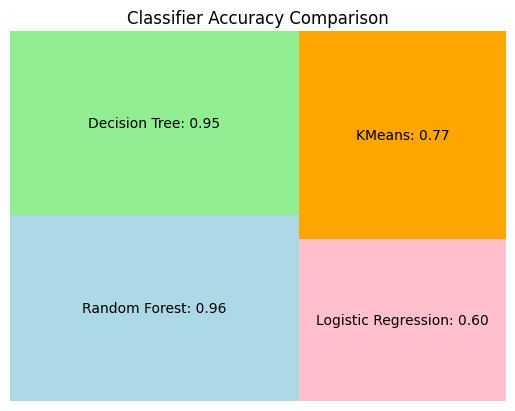

In [ ]:
import matplotlib.pyplot as plt
import squarify

# Define the colors for each classifier
colors = ['lightblue', 'lightgreen', 'pink', 'orange']

# Define the sizes of the rectangles in the treemap
sizes = accuracies

# Define the labels for each rectangle in the treemap
labels = [f"{classifiers[i]}: {accuracies[i]:.2f}" for i in range(len(classifiers))]

# Create the treemap
squarify.plot(sizes=sizes, label=labels, color=colors)

# Add a title
plt.title('Classifier Accuracy Comparison')

# Remove the axis ticks and labels
plt.axis('off')

# Show the plot
plt.show()


## DEEP_LEARNING

In [ ]:
!pip install tensorflow==2.5.0 pyspark==3.1.2 numpy==1.19.5



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.4/454.4 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.4/212.4 MB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 43.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.4/462.4 KB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 32.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 53.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

import numpy as np
import tensorflow as tf



In [ ]:
# Import necessary libraries
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv("/content/drive/MyDrive/star_classification.csv")

# Encode the target column
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('class', axis=1), df['class'], test_size=0.2, random_state=42)

# Define the model architecture
model = keras.Sequential([
    keras.layers.Dense(32, input_dim=X_train.shape[1], activation='softmax'),
    keras.layers.Dense(16, activation='softmax'),
    keras.layers.Dense(7, activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: {:.2f}%'.format(accuracy * 100))


Epoch 1/10
1000/1000 [==============================] - 5s 4ms/step - loss: 1.3337 - accuracy: 0.5910 - val_loss: 1.1285 - val_accuracy: 0.5926
Epoch 2/10
1000/1000 [==============================] - 3s 3ms/step - loss: 1.0766 - accuracy: 0.5954 - val_loss: 1.0471 - val_accuracy: 0.5926
Epoch 3/10
1000/1000 [==============================] - 3s 3ms/step - loss: 1.0268 - accuracy: 0.5954 - val_loss: 1.0168 - val_accuracy: 0.5926
Epoch 4/10
1000/1000 [==============================] - 3s 3ms/step - loss: 1.0053 - accuracy: 0.5954 - val_loss: 1.0014 - val_accuracy: 0.5926
Epoch 5/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.9935 - accuracy: 0.5954 - val_loss: 0.9923 - val_accuracy: 0.5926
Epoch 6/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.9860 - accuracy: 0.5954 - val_loss: 0.9862 - val_accuracy: 0.5926
Epoch 7/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.9809 - accuracy: 0.5954 - val_loss: 0.9819 - val_accuracy:

In [ ]:
# Import necessary libraries
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv("/content/drive/MyDrive/star_classification.csv")

# Encode the target column
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('class', axis=1), df['class'], test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model architecture
model = keras.Sequential([
    keras.layers.Dense(128, input_dim=X_train.shape[1], activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(7, activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: {:.2f}%'.format(accuracy * 100))


Epoch 1/50
1000/1000 [==============================] - 6s 4ms/step - loss: 0.2873 - accuracy: 0.9083 - val_loss: 0.1669 - val_accuracy: 0.9506
Epoch 2/50
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1470 - accuracy: 0.9526 - val_loss: 0.1434 - val_accuracy: 0.9555
Epoch 3/50
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1405 - accuracy: 0.9570 - val_loss: 0.1460 - val_accuracy: 0.9526
Epoch 4/50
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1220 - accuracy: 0.9619 - val_loss: 0.1316 - val_accuracy: 0.9609
Epoch 5/50
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1192 - accuracy: 0.9628 - val_loss: 0.1267 - val_accuracy: 0.9611
Epoch 6/50
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1150 - accuracy: 0.9646 - val_loss: 0.1208 - val_accuracy: 0.9629
Epoch 7/50
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1135 - accuracy: 0.9647 - val_loss: 0.1195 - val_accuracy:

In [ ]:
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Load data from CSV file into a PySpark DataFrame
data = spark.read.csv("/content/star_classification.csv", header=True, inferSchema=True)
data.show()

+--------------------+----------------+------------------+--------+--------+--------+--------+--------+------+--------+-------+--------+--------------------+------+------------+-----+-----+--------+
|              obj_ID|           alpha|             delta|       u|       g|       r|       i|       z|run_ID|rerun_ID|cam_col|field_ID|         spec_obj_ID| class|    redshift|plate|  MJD|fiber_ID|
+--------------------+----------------+------------------+--------+--------+--------+--------+--------+------+--------+-------+--------+--------------------+------+------------+-----+-----+--------+
|1.237660961327743...|  135.6891066036|  32.4946318397087|23.87882| 22.2753|20.39501|19.16573|18.79371|  3606|     301|      2|      79|6.543777369295181...|GALAXY|   0.6347936| 5812|56354|     171|
|1.237664879951151...|144.826100550256|  31.2741848944939|24.77759|22.83188|22.58444|21.16812|21.61427|  4518|     301|      5|     119|1.176014203670733...|GALAXY|    0.779136|10445|58158|     427|
|1.23

In [ ]:
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler, StringIndexer

# Define the input columns and output column
input_cols = ["alpha", "delta", "u", "g", "r", "i", "z", "redshift"]
output_col = "class"

# Index the output column as a numeric label
indexer = StringIndexer(inputCol=output_col, outputCol="label")
data_indexed = indexer.fit(data).transform(data)

# Define the layers for the neural network
layers = [len(input_cols), 5, 4, len(set(data_indexed.select("label").rdd.flatMap(lambda x: x).collect()))]

# Assemble the input features into a single vector column
assembler = VectorAssembler(inputCols=input_cols, outputCol="features")
assembled_data = assembler.transform(data_indexed).select("features", "label")

# Split the data into training and testing sets
(training_data, testing_data) = assembled_data.randomSplit([0.7, 0.3])

# Train the neural network model
mlp = MultilayerPerceptronClassifier(layers=layers, seed=1)
model = mlp.fit(training_data)

# Evaluate the model on the testing set
predictions = model.transform(testing_data)
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="label")
accuracy = evaluator.evaluate(predictions)

print(f"Accuracy = {accuracy*100:.2f}%")


Accuracy = 71.40%


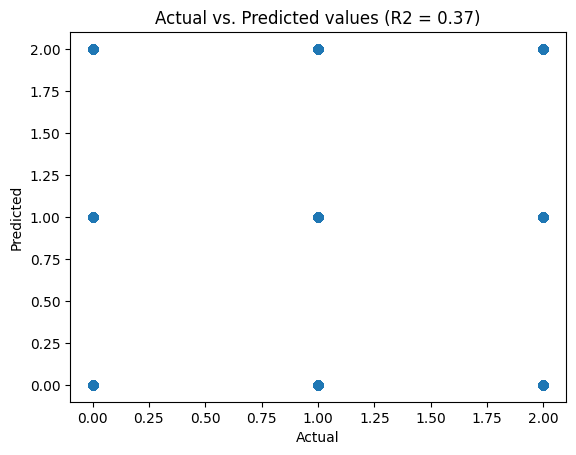

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the testing data
predictions = model.transform(testing_data)

# Select the actual and predicted values
actual = predictions.select("label").toPandas()
predicted = predictions.select("prediction").toPandas()

# Calculate R2 metrics
evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="label", metricName="r2")
r2 = evaluator.evaluate(predictions)

# Plot the actual and predicted values
plt.scatter(actual, predicted)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted values (R2 = {:.2f})".format(r2))
plt.show()
